# Create an interactive figure with marine CO2 equilibria

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib notebook

In [33]:
pH = np.linspace(0, 14, 1401)
H = 10**(-pH)

In [34]:
TIC = 2200*10**(-6) # mol/kg
S = 35 # Old school PSU
T = 20+273.15 # K

![image.png](Mehrbach header.png)
![image.png](Mehrbach table 1.png)

In [35]:
pk1 = -13.7201+0.031334*T+3235.76/T+1.300*10**-5*S*T-0.1032*S**0.5
k1 = 10**(-pk1)
print("k1 and pk1 are {:0.2e} and {:0.2f}, respectively".format(k1, pk1))

k1 and pk1 are 9.41e-07 and 6.03, respectively


In [36]:
pk2 = 5371.9645+1.671221*T+0.22913*S+18.3802*np.log10(S)-128375.28/T \
        -2194.3055*np.log10(T)-8.0944*10**(-4)*S*T-5617.11*np.log10(S)/T+2.136*S/T
k2 = 10**(-pk2)
print("k2 and pk2 are {:0.2e} and {:0.2f}, respectively".format(k2, pk2))

k2 and pk2 are 6.59e-10 and 9.18, respectively


In [37]:
H2CO3 = TIC/(1+k1/H+k1*k2/H**2)

In [38]:
HCO3 = TIC/(1+k1/H+k1*k2/H**2)*(k1/H)

In [39]:
CO3 = TIC/(1+k1/H+k1*k2/H**2)*(k1/H)*(k2/H)

<IPython.core.display.Javascript object>


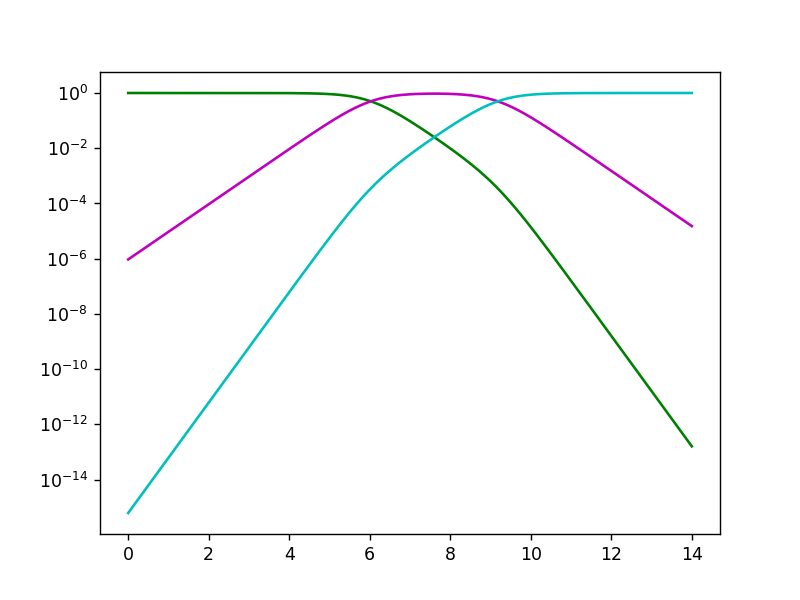

In [40]:
fig, axs = plt.subplots()
axs.semilogy(pH, H2CO3/TIC, 'g')
axs.semilogy(pH, HCO3/TIC, 'm')
axs.semilogy(pH, CO3/TIC, 'c')

In [43]:
#%% Plot!
import plotly
from plotly.graph_objs import Scatter, Figure, Layout

# Nested loops to plot by fin, by ride
data1 = [] # append for plotly

# Plotting variables
x = pH
# y1 = np.log10(H2CO3/TIC)
# y2 = np.log10(HCO3/TIC)
# y3 = np.log10(CO3/TIC)

y1 = H2CO3*10**6
y2 = HCO3*10**6
y3 = CO3*10**6

# Plot
trace1 = Scatter(x=x, y=y1, name = 'H2CO3')
data1.append(trace1)

trace2 = Scatter(x=x, y=y2, name = 'HCO3')
data1.append(trace2)

trace3 = Scatter(x=x, y=y3, name = 'CO3')
data1.append(trace3)


layout1 = Layout(
    yaxis = dict(title = 'Concentration (micromol/kg)'),
    title = 'Marine Inorganic Carbon System',
    xaxis = dict(title = 'pH')
)

fig = Figure(data = data1, layout = layout1)
plotly.offline.plot(fig)

js_div = plotly.offline.plot(fig, include_plotlyjs=False, output_type='div')
js_txt_name = 'marine-co2-equil.txt'
with open(js_txt_name, 'w+') as f:
     f.write(js_div)